In [2]:
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:

b = pd.read_pickle('shear_rate_10k')
c = pd.read_pickle('shear_rate_20k')
d = pd.read_pickle('shear_rate_25k')
e = pd.read_pickle('shear_rate_30k')
f = pd.read_pickle('shear_rate_40k')
g = pd.read_pickle('shear_rate_50k')
h = pd.read_pickle('shear_rate_90k')
X=b
for i in [c,d,e,f,g,h]:
    X=X.append(i)
X = X.reset_index(drop=True)
#print(X)

In [4]:
#X = pd.read_pickle('all_shear_rates')
Y = X[['shear rate']].values.ravel()
print(Y)
X=X.drop(columns=['shear rate'])
print(X)
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)

[10000. 10000. 10000. ... 90000. 90000. 90000.]
      eccentricity  convex_area  major_axis_length  minor_axis_length  \
0         0.925446         35.0          10.834082           4.104815   
1         0.923904        196.0          23.916236           9.150916   
2         0.859746         71.0          12.729776           6.501366   
3         0.883813         37.0           9.661603           4.520088   
4         0.802190         30.0           7.670469           4.579799   
5         0.920629         56.0          13.057401           5.098105   
6         0.804821         38.0           8.978874           5.329122   
7         0.918068         51.0          12.508897           4.958800   
8         0.831915         29.0           7.774565           4.314128   
9         0.834018         46.0           9.991060           5.512435   
10        0.897522         64.0          12.899924           5.688478   
11        0.822086         36.0           8.806154           5.013896   
12 

In [5]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

print("training score:", train_score) 
print("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.2559554328307475
test score:  0.25212113737610653
number of features used:  5


In [6]:
y_pred = lasso.predict(X_test)
print(y_pred)

[59997.69740744 71576.11755539 31926.14839141 ... 25032.75465081
 68149.2742338  40947.00235306]


In [7]:
print(y_test)

[90000. 10000. 10000. ... 40000. 90000. 40000.]


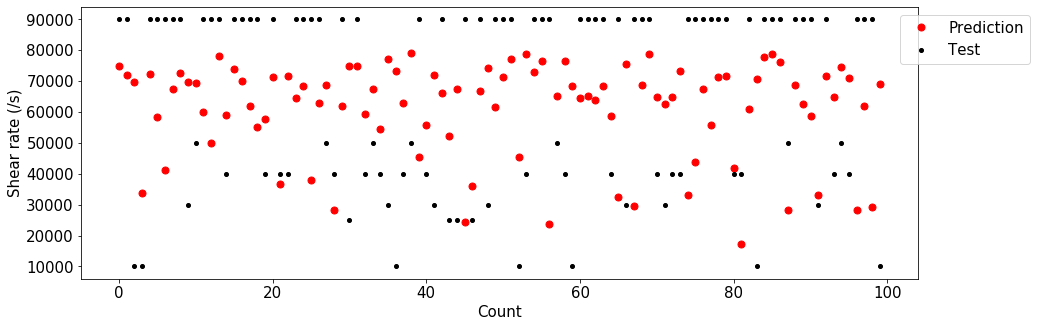

In [20]:
import random
a=np.random.choice(y_pred, size=100)
b=np.random.choice(y_test, size=100) 

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(15,5))
plt.plot(a, 'o', color='red', markersize=7, label='Prediction')
plt.plot(b, 'o', color='black', markersize=4, label='Test')
plt.legend(bbox_to_anchor=(0.97, 1.0))
plt.xlabel('Count')
plt.ylabel('Shear rate (/s)')

plt.savefig('Regression.png')